*Disclaimer Note* The code for this approach was conducted collaboratively by the team, with AI assistance used solely for coding guidance (including comments) and interpretation support. The AI tools we used (Perplexity AI and Chat GPT) serves as a supplementary resource to build code and model accuracy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

# Load your business data into a DataFrame
business_data = pd.read_excel('3_cities_yelp_dataset_business.xlsx')

In [ ]:
# Define a function to correct city names
def correct_city(city):
    # Convert to lowercase for uniformity
    city = str(city).strip().lower()

    # Handle variations for Tampa
    if 'tampa' in city:
        return 'Tampa'
    # Handle variations for Tucson
    elif 'tucson' in city or 'tuscon' in city:  # Correct misspelled "Tuscon"
        return 'Tucson'
    # Handle variations for Philadelphia
    elif 'philadelphia' in city or 'phila' in city or 'philly' in city:
        return 'Philadelphia'
    else:
        return None  # Exclude invalid entries

In [ ]:
# Load the review data into a DataFrame
review_data = pd.read_csv('/content/drive/My Drive/BANA_275_NLP/Group_Project/yelp_dataset_review.csv')

# Merge the business and review data based on the business ID
# Assuming the business ID column is named 'business_id' in both datasets
combined_df = pd.merge(business_data, review_data, on='business_id', how='left')

# Now, you can use this merged DataFrame for further analysis
print(combined_df.head())

              business_id    name               address    city state  \
0  tUFrWirKiKi_TAnsVWINQQ  Target  5255 E Broadway Blvd  Tucson    AZ   
1  tUFrWirKiKi_TAnsVWINQQ  Target  5255 E Broadway Blvd  Tucson    AZ   
2  tUFrWirKiKi_TAnsVWINQQ  Target  5255 E Broadway Blvd  Tucson    AZ   
3  tUFrWirKiKi_TAnsVWINQQ  Target  5255 E Broadway Blvd  Tucson    AZ   
4  tUFrWirKiKi_TAnsVWINQQ  Target  5255 E Broadway Blvd  Tucson    AZ   

   postal_code   latitude   longitude  stars_x  review_count  ...  \
0      85711.0  32.223236 -110.880452      3.5            22  ...   
1      85711.0  32.223236 -110.880452      3.5            22  ...   
2      85711.0  32.223236 -110.880452      3.5            22  ...   
3      85711.0  32.223236 -110.880452      3.5            22  ...   
4      85711.0  32.223236 -110.880452      3.5            22  ...   

                                          categories  \
0  Department Stores, Shopping, Fashion, Home & G...   
1  Department Stores, Shopping, Fa

In [ ]:
# Get unique city entries
unique_cities = combined_df['city'].unique()

# Print the unique city entries
print(unique_cities)

['Tucson' 'Philadelphia' 'Tampa Bay' 'Tampa' 'Tuscon' 'TAMPA'
 'Philadephia' 'PHILA' 'TUCSON' 'Tucson ' 'Phila' 'Philadelphia PA'
 'Philadelphila ' 'Tampa - North' 'PHILADELPHIA' 'tucson'
 'Tucson, Arizona' 'Tampa Florida' 'Tampa Terrace' 'tampa' 'Tampa Palms'
 'Tampa - South' 'philadelphia' 'Tampla' 'Philiidelphia' 'Tampa ' 'Philly'
 'Philadelphia (Northeast Philly)' 'Tampa,Fl' 'TUCSON AP' 'Tampa,'
 'Philadelphia ' 'TAMPA AP' 'Philiadelphia']


In [ ]:
# Apply the correct_city function to the 'city' column
combined_df['city'] = combined_df['city'].apply(correct_city)

# Print the updated DataFrame to verify
print(combined_df)

                    business_id                           name  \
0        tUFrWirKiKi_TAnsVWINQQ                         Target   
1        tUFrWirKiKi_TAnsVWINQQ                         Target   
2        tUFrWirKiKi_TAnsVWINQQ                         Target   
3        tUFrWirKiKi_TAnsVWINQQ                         Target   
4        tUFrWirKiKi_TAnsVWINQQ                         Target   
...                         ...                            ...   
1809108  WnT9NIzQgLlILjPT0kEcsQ  Adelita Taqueria & Restaurant   
1809109  WnT9NIzQgLlILjPT0kEcsQ  Adelita Taqueria & Restaurant   
1809110  WnT9NIzQgLlILjPT0kEcsQ  Adelita Taqueria & Restaurant   
1809111  WnT9NIzQgLlILjPT0kEcsQ  Adelita Taqueria & Restaurant   
1809112  WnT9NIzQgLlILjPT0kEcsQ  Adelita Taqueria & Restaurant   

                      address          city state  postal_code   latitude  \
0        5255 E Broadway Blvd        Tucson    AZ      85711.0  32.223236   
1        5255 E Broadway Blvd        Tucson    AZ    

In [ ]:
print(combined_df.head())

              business_id    name               address    city state  \
0  tUFrWirKiKi_TAnsVWINQQ  Target  5255 E Broadway Blvd  Tucson    AZ   
1  tUFrWirKiKi_TAnsVWINQQ  Target  5255 E Broadway Blvd  Tucson    AZ   
2  tUFrWirKiKi_TAnsVWINQQ  Target  5255 E Broadway Blvd  Tucson    AZ   
3  tUFrWirKiKi_TAnsVWINQQ  Target  5255 E Broadway Blvd  Tucson    AZ   
4  tUFrWirKiKi_TAnsVWINQQ  Target  5255 E Broadway Blvd  Tucson    AZ   

   postal_code   latitude   longitude  stars_x  review_count  ...  \
0      85711.0  32.223236 -110.880452      3.5            22  ...   
1      85711.0  32.223236 -110.880452      3.5            22  ...   
2      85711.0  32.223236 -110.880452      3.5            22  ...   
3      85711.0  32.223236 -110.880452      3.5            22  ...   
4      85711.0  32.223236 -110.880452      3.5            22  ...   

                                          categories  \
0  Department Stores, Shopping, Fashion, Home & G...   
1  Department Stores, Shopping, Fa

In [ ]:
# Get unique city entries
unique_cities = combined_df['city'].unique()

# Print the unique city entries
print(unique_cities)

['Tucson' 'Philadelphia' 'Tampa' None]


In [ ]:
# Debugging: Check available columns
print("Columns in combined_df:", combined_df.columns)

Columns in combined_df: Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'stars_y',
       'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')


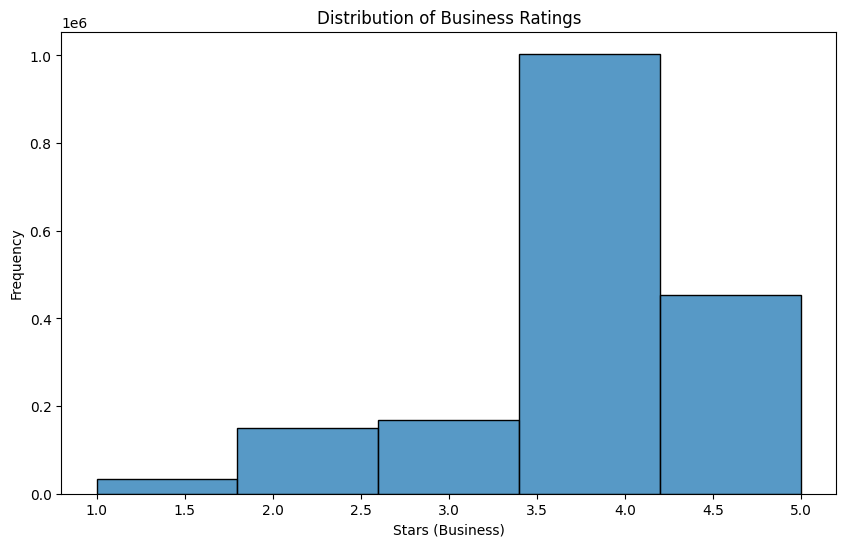

In [ ]:
# Distribution of Business Ratings (use 'stars_x')
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['stars_x'], bins=5)
plt.title('Distribution of Business Ratings')
plt.xlabel('Stars (Business)')
plt.ylabel('Frequency')
plt.show()

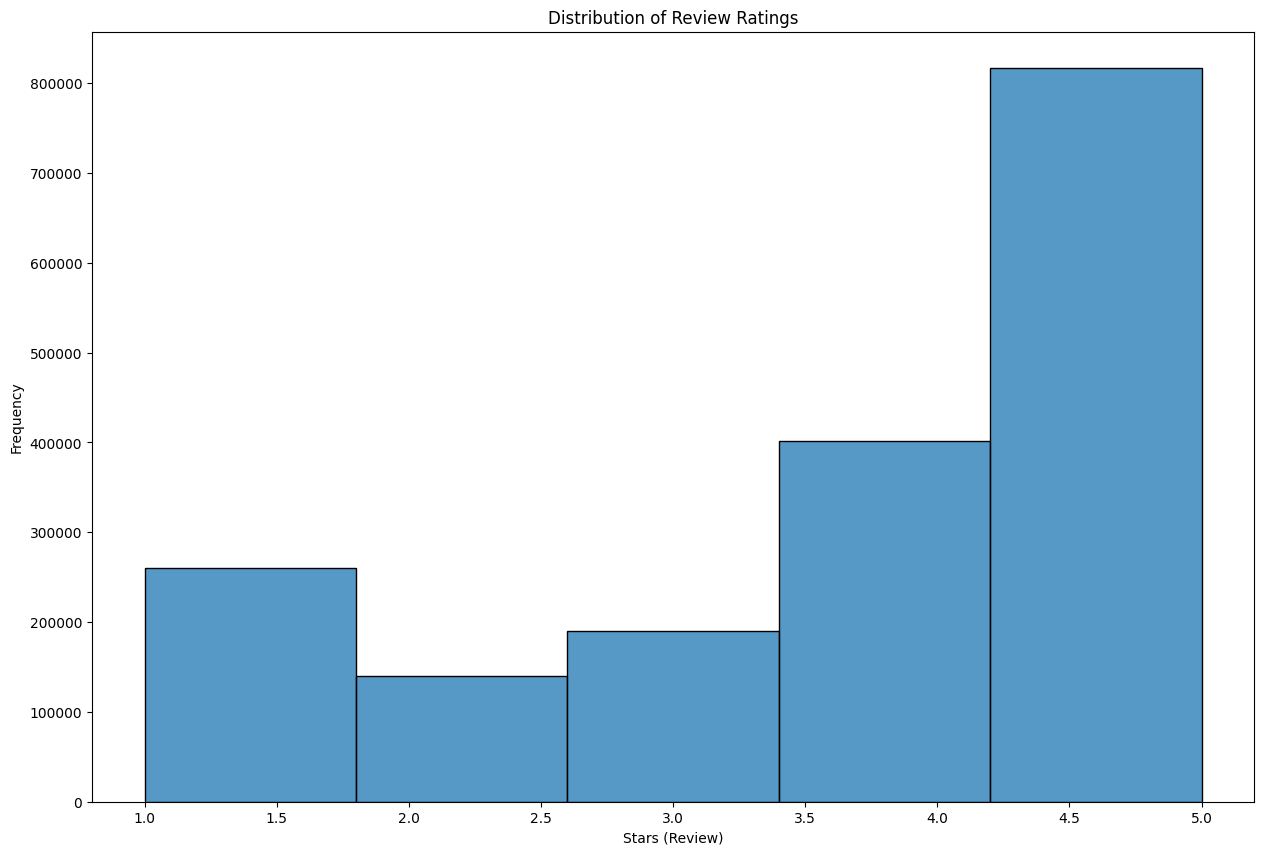

In [ ]:
# Distribution of Review Ratings (use 'stars_y')
plt.figure(figsize=(15, 10))
sns.histplot(combined_df['stars_y'], bins=5)
plt.title('Distribution of Review Ratings')
plt.xlabel('Stars (Review)')
plt.ylabel('Frequency')
plt.show()

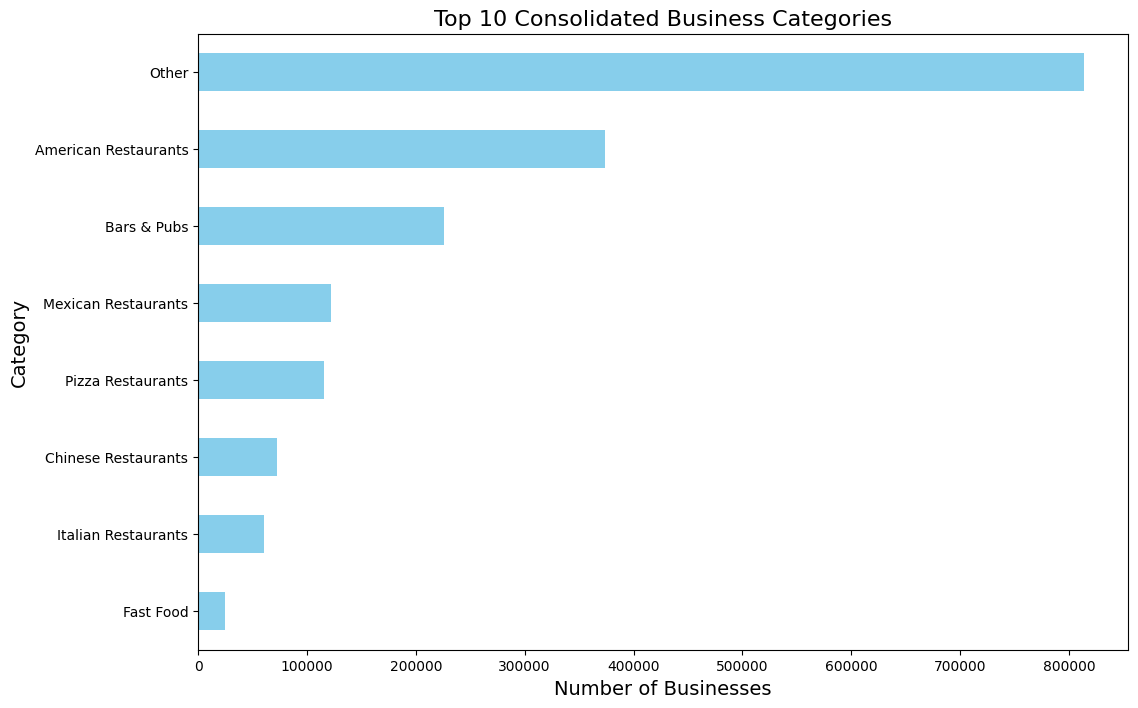

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a mapping function to consolidate categories
def consolidate_categories(categories):
    if pd.isna(categories):
        return None  # Handle NaN values
    categories = categories.lower()  # Convert to lowercase for uniformity

    # Consolidation rules
    if 'mexican' in categories and 'restaurant' in categories:
        return 'Mexican Restaurants'
    elif 'pizza' in categories:
        return 'Pizza Restaurants'
    elif 'italian' in categories and 'restaurant' in categories:
        return 'Italian Restaurants'
    elif 'american' in categories and 'restaurant' in categories:
        return 'American Restaurants'
    elif 'chinese' in categories and 'restaurant' in categories:
        return 'Chinese Restaurants'
    elif 'fast food' in categories:
        return 'Fast Food'
    elif 'bar' in categories or 'pub' in categories:
        return 'Bars & Pubs'
    else:
        return 'Other'

# Apply the function to the 'categories' column
combined_df['consolidated_categories'] = combined_df['categories'].apply(consolidate_categories)

# Count the top 10 consolidated categories
top_consolidated_categories = combined_df['consolidated_categories'].value_counts()[:10]

# Plot the top 10 consolidated categories
plt.figure(figsize=(12, 8))
top_consolidated_categories.plot(kind='barh', color='skyblue')
plt.title('Top 10 Consolidated Business Categories', fontsize=16)
plt.xlabel('Number of Businesses', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

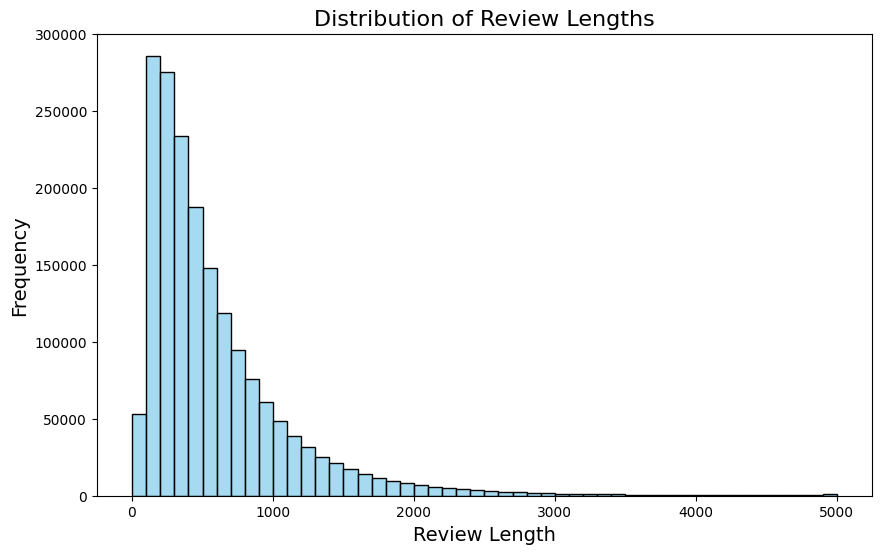

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the 'text' column exists in combined_df
if 'text' not in combined_df.columns:
    print("Column 'text' not found. Please check your dataset for correct column names.")
else:
    # Calculate review length, handling non-string values
    combined_df['review_length'] = combined_df['text'].astype(str).apply(len) # Changed to convert 'text' column to string type before applying len

    # Plot distribution of review lengths
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['review_length'], bins=50, color='skyblue')
    plt.title('Distribution of Review Lengths', fontsize=16)
    plt.xlabel('Review Length', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

In [ ]:
# WITHOUT RAG + LLM INTEGRATION

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets

# Assuming combined_df is already created and contains the necessary data
# Ensure combined_df has columns: 'business_id', 'name', 'text', 'city', 'categories'

# Step 1: Define the list of allowed cities
allowed_cities = ['Tampa', 'Philadelphia', 'Tucson']

# Step 2: Set up TF-IDF vectorizer (initialized but not used until city is selected)
tfidf = TfidfVectorizer(stop_words='english')

# Step 3: Define recommendation function with category filtering
def get_recommendations(user_input, city):
    # Filter the DataFrame by city
    city_df = combined_df[combined_df['city'] == city]

    # Additional filtering: Only include businesses with relevant categories
    relevant_categories = ['Restaurant', 'Food', 'Sushi', 'Japanese', 'Bar']  # Adjust as needed
    city_df = city_df[city_df['categories'].str.contains('|'.join(relevant_categories), case=False, na=False)]

    if city_df.empty:
        return ["No relevant businesses found in this city."]

    # Drop rows where 'text' is NaN or replace NaN with an empty string
    city_df = city_df.dropna(subset=['text'])  # Drop rows with NaN in 'text'
    # Alternatively, replace NaN with an empty string:
    # city_df['text'] = city_df['text'].fillna('')

    if city_df.empty:
        return ["No valid reviews available for recommendations."]

    # Create TF-IDF matrix for reviews in the filtered city DataFrame
    tfidf_matrix_city = tfidf.fit_transform(city_df['text'])

    # Transform user input into TF-IDF vector
    user_vector = tfidf.transform([user_input])

    # Compute cosine similarity
    similarities = cosine_similarity(user_vector, tfidf_matrix_city)

    # Get top 5 recommendations (most similar)
    top_indices = similarities.argsort()[0][-5:][::-1]
    recommendations = city_df.iloc[top_indices]['name'].tolist()  # Use 'name' column for recommendations

    return recommendations

# Step 4: Set up chatbot interface using ipywidgets
output_area = widgets.Output()
city_dropdown = widgets.Dropdown(
    options=allowed_cities,
    description="City:",
    value=None,
)

input_box = widgets.Text(description="User Input:")
send_button = widgets.Button(description="Send")

def on_send(b):
    with output_area:
        output_area.clear_output()

        # Get selected city and user input
        selected_city = city_dropdown.value
        user_input = input_box.value

        if not selected_city:
            print("Chatbot: Please select a city from the dropdown.")
            return

        if user_input.lower() == 'exit':
            print("Chatbot: Thank you for using our recommendation system. Goodbye!")
            return

        if not user_input.strip():
            print("Chatbot: Please enter what kind of food or experience you are looking for.")
            return

        print(f"User selected city: {selected_city}")
        print(f"User input: {user_input}")

        # Get recommendations based on user input and selected city
        recommendations = get_recommendations(user_input, selected_city)

        if recommendations:
            response = f"Chatbot: Based on your input, here are some restaurant recommendations in {selected_city}:\n" + "\n".join(recommendations)
        else:
            response = f"Chatbot: Sorry, no matching restaurants found in {selected_city} based on your input."

        print(response)

# Attach event handler to send button
send_button.on_click(on_send)

# Display the chat interface with dropdown for city selection and input box for user query
display(widgets.VBox([city_dropdown, input_box, send_button, output_area]))

with output_area:
    print("Chatbot: Hello! I'm your restaurant recommendation chatbot. Please select your city from the dropdown and tell me what kind of food or experience you're looking for.")